<h1>Data Visualization</h1>

<h3>Working with Seaborn Library</h3>

In [8]:
%matplotlib inline
import pandas as pd

wine_review = pd.read_csv('winemag-data_first150k.csv', index_col=0)
wine_review.head(4)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi


<h3>Countplot</h3>

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


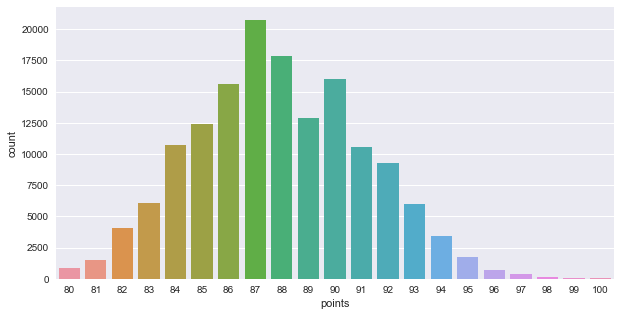

In [63]:
# pandas bar plot becomes countplot in seaborn library
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(wine_review['points'])

<h3>KDE Plot</h3>

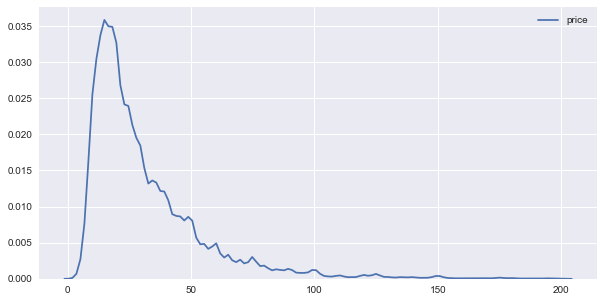

In [18]:
# It will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.
sns.kdeplot(wine_review.query('price < 200').price)

A KDE plot is better than a line chart for getting the "true shape" of interval data. In fact, I recommend always using it instead of a line chart for such data.

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


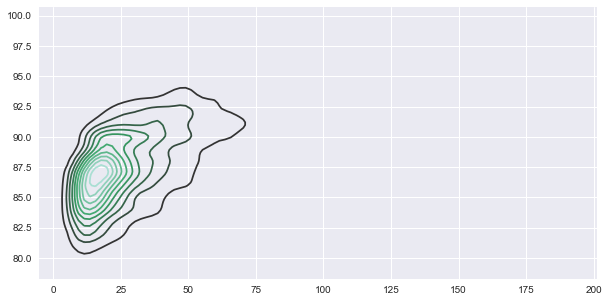

In [19]:
# KDE plots can also be used in two dimensions.
sns.kdeplot(wine_review[wine_review['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address

<h3>Distplot</h3>

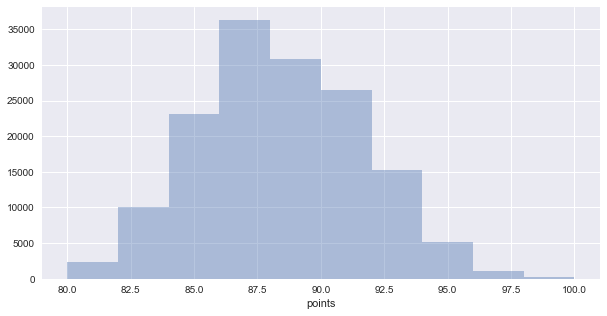

In [27]:
# pandas histogram is simillar to Distplot
sns.distplot(wine_review['points'], bins=10, kde=False)

<h3>Scatterplot and Hexplot</h3>

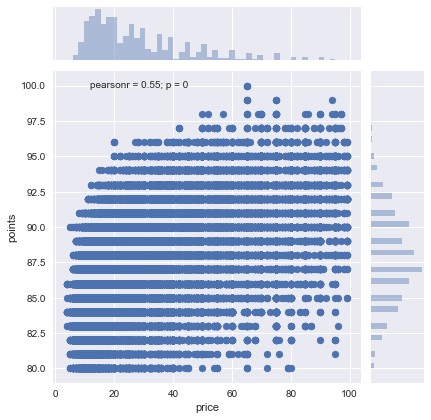

In [29]:
# use jointplot to plot two varibles against each other

sns.jointplot(x = 'price', y='points', data = wine_review[wine_review['price'] < 100])

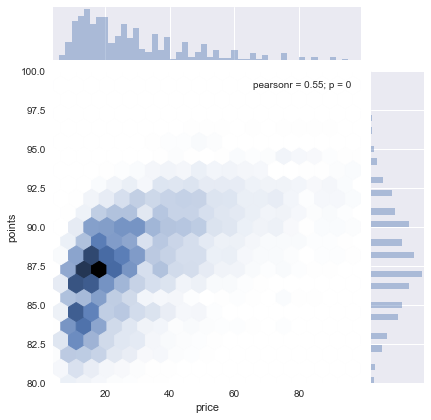

In [31]:
sns.jointplot(x = 'price', y = 'points', data = wine_review[wine_review['price'] < 100], kind = 'hex', gridsize = 20)

<h3>Boxplot and violin plot</h3>

In [33]:
wine_review.variety.value_counts().head(5).index

Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


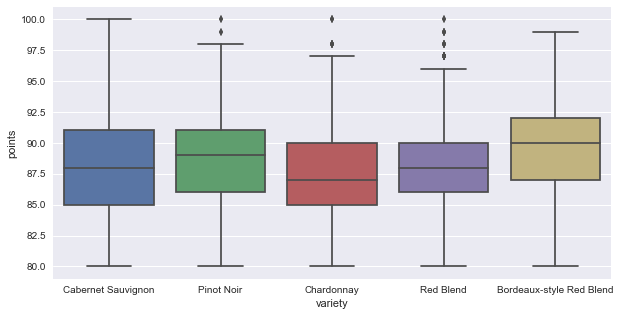

In [40]:
df = wine_review[wine_review.variety.isin(wine_review.variety.value_counts().head(5).index)]
sns.boxplot(x = 'variety', y = 'points', data = df)

The top of the box is the 75th percentile, while the bottom is the 25th percentile. Bordeaux-style wines tend to be rated a little higher than a Chardonnay. The green line in the middle is the median.

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


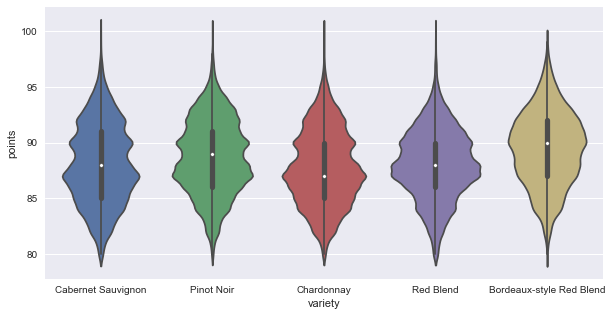

In [41]:
sns.violinplot(x='variety', y='points', data = wine_review[wine_review.variety.isin(wine_review.variety.value_counts()[:5].index)])

<h3>Working with Pokemon dataset</h3>

In [44]:
pokemon = pd.read_csv('pokemon.csv', index_col=0)
pokemon.head(4)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,4,60,50,65,fire,NaN,8.5,1,0


C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


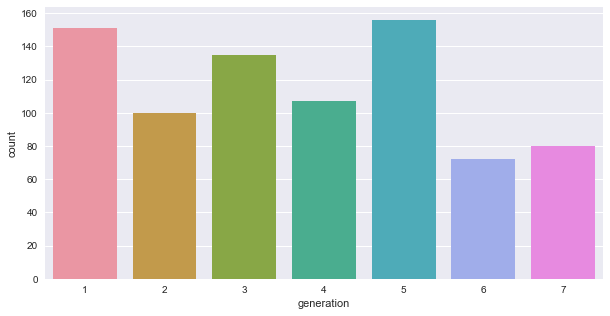

In [45]:
# Countplot
sns.countplot(pokemon['generation'])

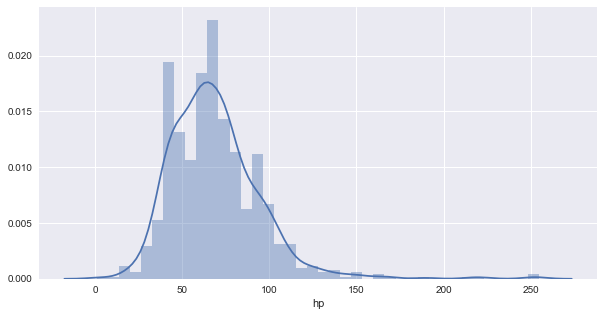

In [52]:
# Distplot
sns.distplot(pokemon['hp'])

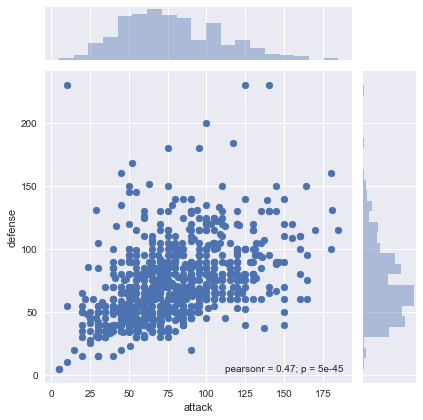

In [53]:
# Jointplot
sns.jointplot(x='attack', y='defense', data=pokemon)

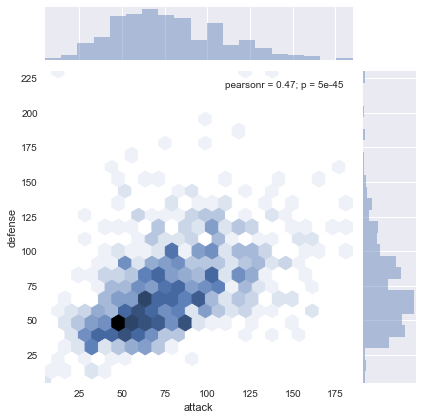

In [55]:
sns.jointplot(x='attack', y= 'defense', data=pokemon, kind = 'hex')

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


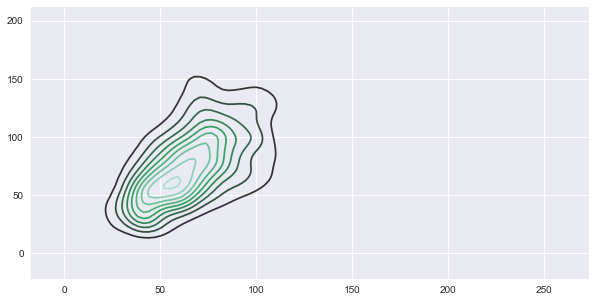

In [57]:
# KDE plots can also be used in two dimensions.
sns.kdeplot(pokemon[['hp', 'attack']])

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


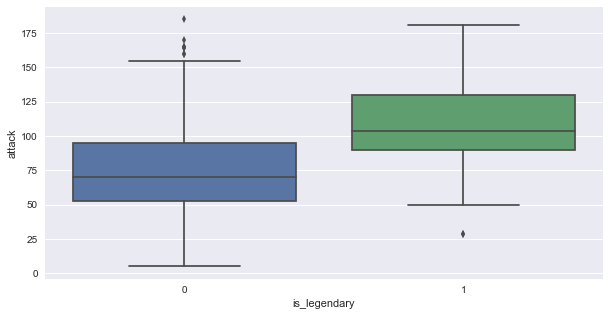

In [59]:
# Boxplot
sns.boxplot(x = 'is_legendary', y = 'attack', data = pokemon)

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


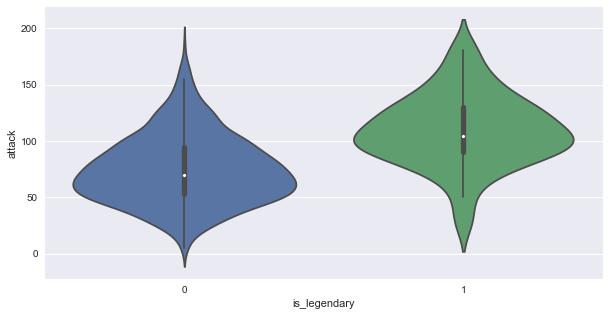

In [60]:
sns.violinplot(x='is_legendary', y='attack', data = pokemon)